<a href="https://colab.research.google.com/github/nasywabefi/HomePriceRegresion_Modul1/blob/main/Modul1_PengantarAI_NasywaBefiputri_2203015044.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tugas Pengantar Kecerdasan tiruan 5A - Modul 1
Nasywa Befiputri (2203015044)

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

##import data set ke data frame df_boston

In [ ]:
url = "https://raw.githubusercontent.com/nasywabefi/HomePriceRegresion_Modul1/main/HousingData.csv"
df_boston = pd.read_csv(url, encoding='ISO-8859-1')
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


##cek semua info yang ada di df_boston

In [ ]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


 ## memilih features (input) dan target (output)

In [ ]:
# Pilih fitur dan target
features = ["DIS", "NOX", "RM", "TAX"]  # Lokasi, lingkungan, rumah, pajak
target = "MEDV"

X = df_boston[features]
y = df_boston[target]


## train dan test set

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=1)

#print ukuran set
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(303, 4)
(203, 4)
(303,)
(203,)


## pastikan fitur input berada dalam rentang yang sama

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## melatih model regresi linier

In [ ]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

##mencetak nilai intercept (konstanta)

In [ ]:
print ('constant term :', lr.intercept_)
print ('coefficient :', lr.coef_)

constant term : -8.801976080384485
coefficient : [-7.91604728e-01 -2.30157327e+01  8.13210947e+00 -9.92393997e-03]


##menghitung dan menilai kinerja model regresi linier

In [ ]:
ypred=lr.predict(xtest)
mse=mean_squared_error(ytest,ypred)
r2=lr.score(xtest,ytest)
print ('mse :', mse)
print ('r2 :', r2)

mse : 24.98482345623413
r2 : 0.6839999354740163


## menunjukkan perbandingan antara nilai target yang sebenarnya dan nilai prediksi yang dihasilkan oleh model

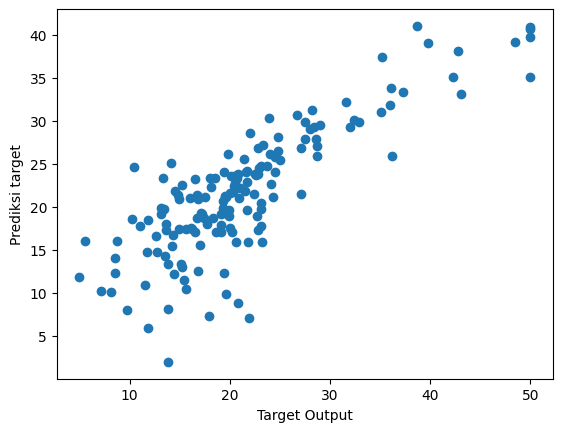

In [ ]:
plt.figure()
plt.scatter(ytest,ypred)
plt.xlabel('Target Output')
plt.ylabel('Prediksi target')
plt.show()